In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
%matplotlib inline

num = 5000
sizes = 0.2 * np.random.random(num)
xy = 50 * np.random.random((num, 2))

# Note that the patches won't be added to the axes, instead a collection will
patches = [plt.Circle(center, size, fc = 'blue') for center, size in zip(xy, sizes)]

fig, ax = plt.subplots()

coll = matplotlib.collections.PatchCollection(patches, facecolors='darkred')
ax.add_collection(coll)

ax.margins(0.01)
plt.show()

In [ ]:
xy.shape

In [ ]:
for l in zip(xy[:20],sizes[:20]):
    print (l)

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline


# setup Lambert Conformal basemap.
m = Basemap(width=3000000,height=2000000,
            resolution='h',projection='aea',\
            lat_1=-23.36,lat_2=-20.76,lon_0=-44.889,lat_0=-40.958)
# m = Basemap(llcrnrlat=-23.144802, llcrnrlon= -43.714794, urcrnrlat=-22.626076,
#             urcrnrlon= -42.969097,width=12000000,height=9000000,projection='aea',
#             resolution='l')
# draw coastlines.
m.drawcoastlines(color='white')
#m.readshapefile('/tmp/transliterated', 'subDistricts')
m.drawstates(color='yellow')
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='#47CAFC')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='#D3C084',lake_color='#47CAFC',alpha=0.8)
plt.show()

In [ ]:
from shapely.geometry import MultiPolygon

file = '/Users/linwood/Downloads/shapefiles/rioDeJaneiro/rj_subdistritos/33SDE250GC_SIR.shp'
multi = []

# append the geometries to the list
for pol in fiona.open(file,'r'):
    multi.append(shape(pol['geometry']))
# create the MultiPolygon from the list of Polygons
mp = MultiPolygon(multi)

mp

# pol = c.next()
# geom = shape(pol['geometry'])

In [ ]:
import fiona
c = fiona.open('/Users/linwood/Downloads/shapefiles/rioDeJaneiro/rj_subdistritos/33SDE250GC_SIR.shp','r')

In [ ]:
from random import shuffle, randint
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint, MultiPolygon
from descartes import PolygonPatch

In [ ]:
# lower left minx miny , upper right maxx maxy
bounds = list(c.bounds)
minx, miny, maxx, maxy = bounds
w, h = maxx - minx, maxy - miny

# generate random points within the bounds
lon = np.linspace(minx, maxx).tolist()
lat = np.linspace(miny, maxy).tolist()
random.shuffle(lon)
random.shuffle(lat)

# create a new matplotlib figure and axes instance
fig = plt.figure()
ax = fig.add_subplot(111)
# add a basemap and a small additional extent

m = Basemap(
    projection='cea',
    
    llcrnrlon=minx - 0.2 * w,
    llcrnrlat=miny - 0.2 * h,
    urcrnrlon=maxx + 0.2 * w,
    urcrnrlat=maxy + 0.2 * h,
    lat_ts=0,
    resolution='h')

m.drawcoastlines(color='white')
#m.readshapefile('/tmp/transliterated', 'subDistricts')
m.drawstates(color='yellow')
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='#47CAFC')
m.fillcontinents(color='#D3C084',lake_color='#47CAFC',alpha=0.8)

# a shapefile can be added like so if needed
# m.readshapefile('london_shp', 'london', color='#555555')

# set axes limits to basemap's coordinate reference system 
min_x, min_y = m(minx, miny)
max_x, max_y = m(maxx, maxy)
corr_w, corr_h = max_x - min_x, max_y - min_y
ax.set_xlim(min_x - 0.2 * corr_w, max_x + 0.2 * corr_w)
ax.set_ylim(min_y - 0.2 * corr_h, max_y + 0.2 * corr_h)
# square up axes and basemap
ax.set_aspect(1)
# buffer units are translated to metres by Basemap
# we're randomly varying between 7.5k and 15k metres
patches = [PolygonPatch(Point(m(lon, lat)).buffer(1.0 * randint(7500, 15000)),
                        fc='#cc00cc', ec='#555555', alpha=0.5, zorder=4)
           for lon, lat in zip(lon, lat)]

ax.add_collection(PatchCollection(patches, match_original=True))
#plt.savefig('data/uk.png', dpi=300)
plt.show()

In [ ]:
rec = next(c)

In [ ]:
rec['properties']

In [ ]:
c[0]

In [ ]:
rec = next(c)

In [ ]:
rec['id']

In [ ]:
len(rec['geometry'])

In [ ]:
rec['geometry'].keys()

In [ ]:
rec['geometry']['type']

In [ ]:
rec.keys()

In [ ]:
c.bounds

In [ ]:
import fiona
from unidecode import unidecode
import unicodedata

with fiona.open(
        '/Users/linwood/Downloads/shapefiles/rioDeJaneiro/rj_subdistritos/33SDE250GC_SIR.shp','r') as source:

    # Create an output shapefile with the same schema,
    # coordinate systems. ISO-8859-1 encoding.
    with fiona.open(
            '/tmp/transliterated.shp', 'w',
            **source.meta) as sink:

        # Identify all the str type properties.
        str_prop_keys = [
            k for k, v in sink.schema['properties'].items()
                if v.startswith('str')]

        for rec in source:

            # Transliterate and update each of the str properties.
            for key in str_prop_keys:
                val = rec['properties'][key]
                if val:
                    rec['properties'][key] = unidecode(val)

            # Write out the transformed record.
            sink.write(rec)

In [ ]:
m.readshapefile('/tmp/transliterated.shp', )

In [ ]:
ax = None
lllat = 17.25
urlat = 20.25
lllon = -75
urlon=71

m = Basemap(ax = ax, projection='stere',
           lon_0 = (urlon + lllon)/2,
           lat_0 = (urlat + lllat)/2,
           llcrnrlat=lllat, urcrnrlat=urlat,
           llcrnrlon = lllon, urcrnrlon = urlon,
           resolution = 'f')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
return m





In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a','1','3c','7a']
lllat = 17.25; urlat = 20.25; lllon = -75; urlong = -71

for code, ax in zip(to_plot,axes.flat):
    m=basic_haiti_map(ax,lllat=lllat,urlat=urlat,
                     lllon=lllon,urlon=urlon)
cat_da

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


m = Basemap(projection='cea',llcrnrlat=18.466150,urcrnrlat=18.770566,
            llcrnrlon=-72.422595,urcrnrlon=-72.082206,resolution='h')
m.drawcoastlines(color='white')
#m.readshapefile('/tmp/transliterated', 'subDistricts')
m.drawstates(color='yellow')
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='#47CAFC')
m.fillcontinents(color='#D3C084',lake_color='#47CAFC',alpha=0.8)
m.readshapefile('/Users/linwood/Downloads/shapefiles/Haiti/PortAuPrince_Roads/PortAuPrince_Roads','Roads')
# fill continents, set lake color same as ocean color.

plt.title('Port-au Prince')
plt.show()

# Geopandas Visualization

In [21]:
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

file = '/Users/linwood/Downloads/shapefiles/rioDeJaneiro/rj_distritos/33DSE250GC_SIR.shp'
subDistricts = gp.GeoDataFrame.from_file(file)
subDistricts.head()

,CD_GEOCODD,ID,NM_DISTRIT,geometry
0,330010005,2329.0,ANGRA DOS REIS,(POLYGON ((-44.39443586584839 -23.072543739117...
1,330010010,2330.0,ABRAÃO,(POLYGON ((-44.35969539736099 -23.215031947714...
2,330010015,2331.0,CUNHAMBEBE,"(POLYGON ((-44.36995694245859 -23.01064723207,..."
3,330010025,2332.0,MAMBUCABA,(POLYGON ((-44.60517752737229 -22.943609479384...
4,330015905,2333.0,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...


In [34]:
subDistricts[subDistricts.NM_DISTRIT == 'RIO DE JANEIRO']

,CD_GEOCODD,ID,NM_DISTRIT,geometry
209,330455705,2538.0,RIO DE JANEIRO,(POLYGON ((-43.1237647832704 -22.8071200194477...


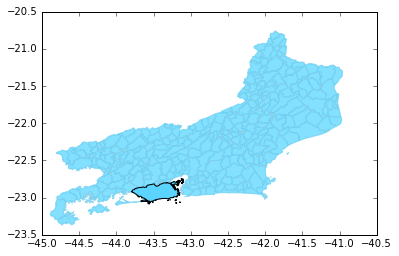

In [35]:
subDistricts_plot = subDistricts.plot()
for p_ny in subDistricts_plot.patches:
    p_ny.set_color("#111111")
    p_ny.set_alpha(0.6)

for line in subDistricts_plot.lines:
    line.set_linewidth(0.25)
    line.set_alpha(0.9)
    line.set_color("#d3d3d3")

RiodeJaneiro = subDistricts[subDistricts.NM_DISTRIT == 'RIO DE JANEIRO']
RiodeJaneiro_plot = RiodeJaneiro.plot()
for p_mh in RiodeJaneiro_plot.patches:
    p_mh.set_color("#33ccff")

plt.show()

In [3]:
import json
import re

#shameless copy paste from json/decoder.py
FLAGS = re.VERBOSE | re.MULTILINE | re.DOTALL
WHITESPACE = re.compile(r'[ \t\n\r]*', FLAGS)

class ConcatJSONDecoder(json.JSONDecoder):
    def decode(self, s, _w=WHITESPACE.match):
        s_len = len(s)

        objs = []
        end = 0
        while end != s_len:
            obj, end = self.raw_decode(s, idx=_w(s, end).end())
            end = _w(s, end).end()
            objs.append(obj)
        return objs


In [9]:
import os
import numpy as np

import matplotlib,matplotlib.pyplot as plt

%matplotlib inline

path = os.path.normpath(os.path.join(os.path.normpath(os.path.expanduser("~")),"projects","LC3-Creations"))

brazilTweets = json.load(open('/Users/linwood/projects/LC3-Creations/notebooks/twittertest/output/brazilSample.txt'), cls=ConcatJSONDecoder)

# Create a function for the `map()`

In [10]:
def crunch(x):
    coords = []
    if x['coordinates'] is not None:
        coords.append((x['coordinates']['coordinates'][0],x['coordinates']['coordinates'][1]))
    else:
        pass
    filter(lambda x: len(x)<1,coords)
    return coords

# Use `map()` output for `filter()`

In [11]:

xy = (map(crunch,brazilTweets))


new_xy = []
for l in list(xy):
    if len(l)>0:
        new_xy.append(l[0])
    else:
        pass
xy = np.asarray(new_xy)

In [12]:
xy[0]

array([-43.1149975 , -22.89260394])

# Build patches paramters for matplotlib plotting

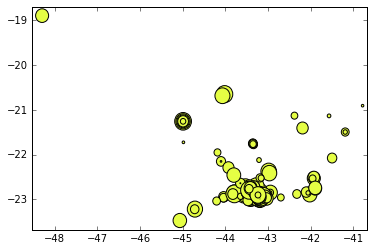

In [13]:
num = len(xy)
sizes = 0.2 * np.random.random(num)


# Note that the patches won't be added to the axes, instead a collection will
patches = [plt.Circle(center, size, fc = 'blue') for center, size in zip(xy, sizes)]

fig, ax = plt.subplots()

coll = matplotlib.collections.PatchCollection(patches, facecolors="#e5fe44")
ax.add_collection(coll)

ax.margins(0.01)
plt.show()

# Using filter to subset Tweets

In [14]:
b = list(filter(lambda x: x['coordinates'] is not None, brazilTweets))

In [15]:
b[0]

{'contributors': None,
 'coordinates': {'coordinates': [-43.1149975, -22.89260394], 'type': 'Point'},
 'created_at': 'Sat Mar 26 16:04:33 +0000 2016',
 'entities': {'hashtags': [{'indices': [15, 20], 'text': 'Momo'},
   {'indices': [27, 33], 'text': 'Bilbo'},
   {'indices': [38, 44], 'text': 'gatos'}],
  'symbols': [],
  'urls': [{'display_url': 'instagram.com/p/BDbBrCOCCAO/',
    'expanded_url': 'https://www.instagram.com/p/BDbBrCOCCAO/',
    'indices': [67, 90],
    'url': 'https://t.co/a1Qya7uHNl'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': {'coordinates': [-22.89260394, -43.1149975], 'type': 'Point'},
 'id': 713758549336309762,
 'id_str': '713758549336309762',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'pt',
 'place': {'attributes': {},
  'bounding_box': {'coordinates'

In [ ]:
count = 0
xy = [l['cooridinates']['coordinates'][1] for l in brazilTweets if l['coordinates'] is not None]
# for l in sample:
#     if l['coordinates'] is not None:
#         x
        
# count

In [19]:
len(xy)

210

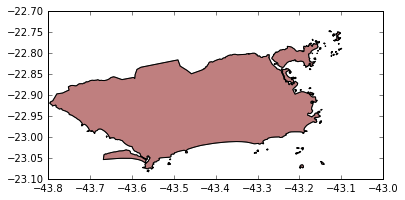

In [22]:
subDistricts[subDistricts['NM_DISTRIT'].str.contains('RIO DE')].plot()

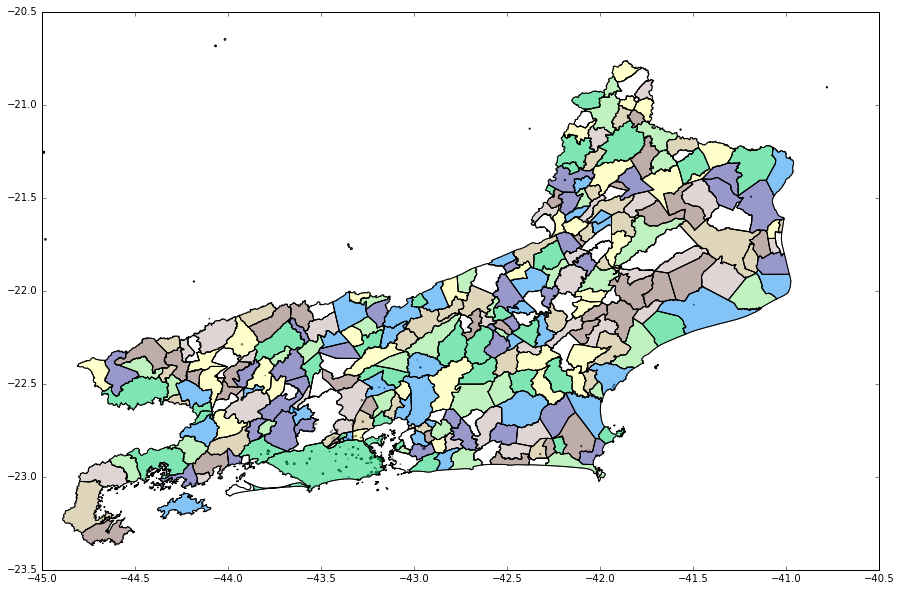

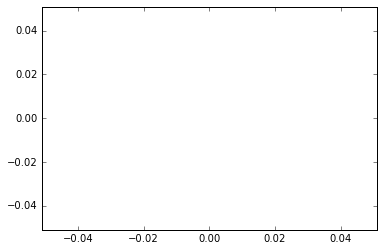

In [31]:
import shapely
studyarea = shapely.geometry.box(-43.25, -23.05, -43.15, -22.95)
ax1 = subDistricts.plot(colormap='terrain')
ax1.set_aspect(1)
fig = plt.gcf()
fig.set_size_inches(15, 10)

num = len(xy)
sizes = 0.005 * np.random.random(num)


# Note that the patches won't be added to the axes, instead a collection will
patches = [plt.Circle(center, size, fc = 'blue') for center, size in zip(xy, sizes)]

fig, ax = plt.subplots()

coll = matplotlib.collections.PatchCollection(patches, facecolors="#e5fe44")
ax1.add_collection(coll)

ax.margins(0.01)
plt.show()